## Phishing URL Website Detection using Machine Learning

## Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Capstone (Phishing URLS detection using machine learning)/phishing.csv')

#displaying the first 5 rows
data.head()


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [4]:
#Displaying the shape of the data set

data.shape

(10000, 18)

In [5]:
#Displaying a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## Data Preprocessing
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [6]:
#Displaying a stastical summary of the dataset
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. This resulted in the decision to drop the  *'Domain'* column from the dataset.

In [7]:
#Dropping the Domain column
data = data.drop(['Domain'], axis = 1).copy()

This leaves the dataset with 16 features & a target column.

In [8]:
#Counting and checking for null values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

To have the same range of feature values while splitting the data into training & testing sets, we need to shuffle the data

In [9]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,4,0,0,1,1,0,1,1,1,0,0,1,0,1
1,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
6,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,0
7,0,0,1,2,0,0,0,0,1,1,1,1,1,1,1,1,1
8,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
9,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1


**Quick observation**: The dataset has no null values. So further processing will not be done such as replace or deleting null rows. data is ready for traning, before training we visualise the data

## Visually Displaying data

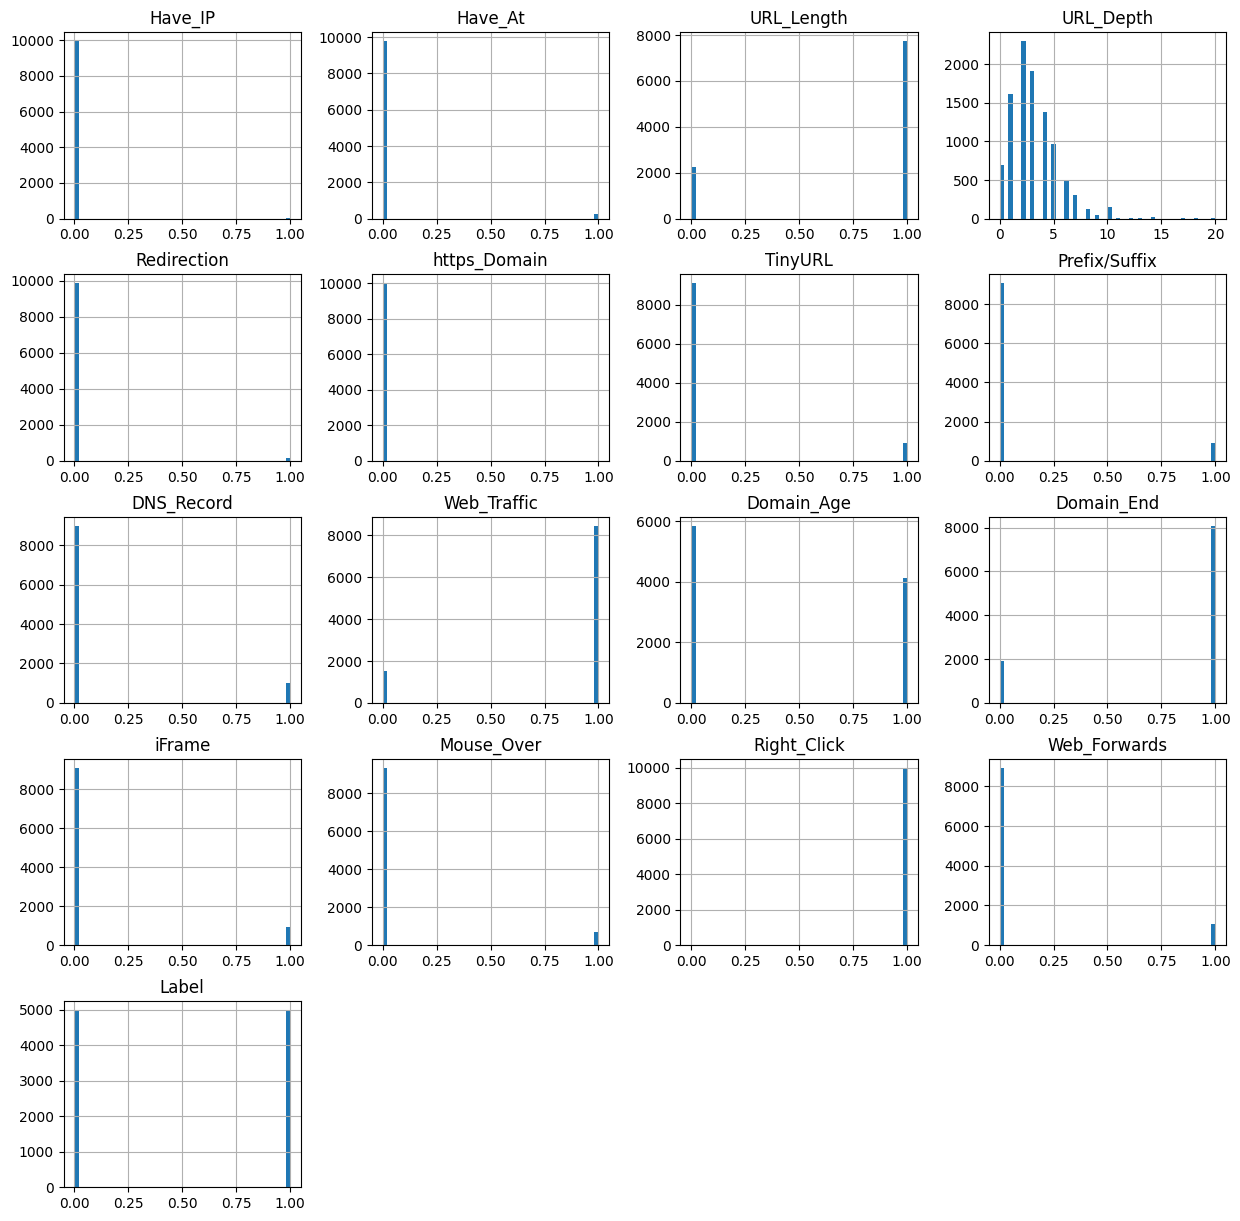

In [10]:
#Plotting the data distribution with a histogram
data.hist(bins = 50,figsize = (15,15))
plt.show()

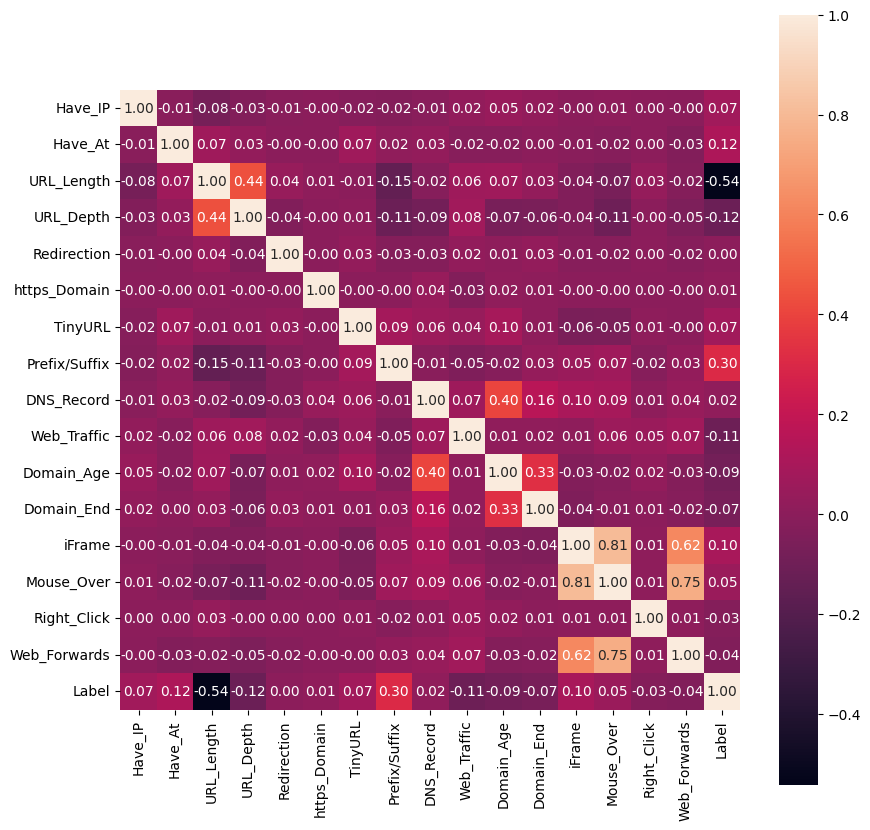

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# calculate correlation coefficients for the dataset
correlations = data.corr()

# and visualize
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

<Axes: >

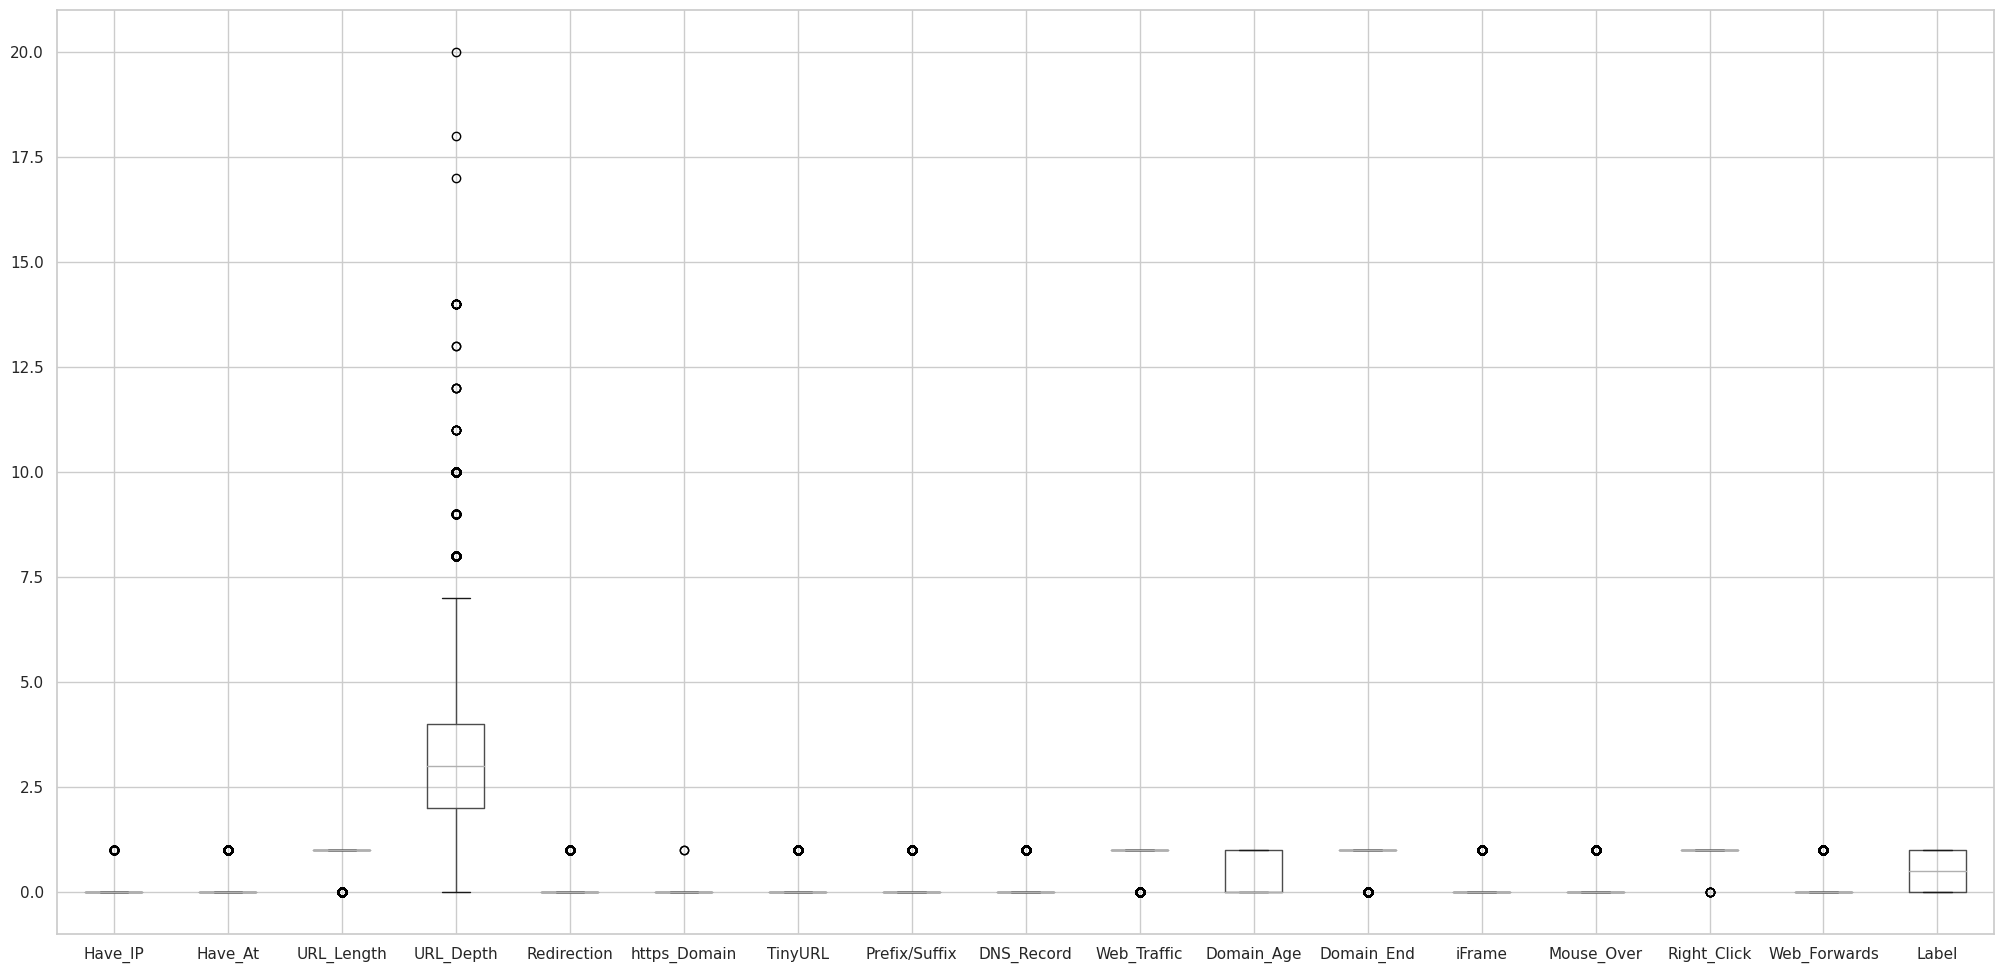

In [12]:
sns.set(style="whitegrid")
data.boxplot(figsize=(25,12))

## Training and Testing

In [33]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [14]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)

In [15]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)

## Machine Learning Models

From the dataset above, We have learnt that this is a supervised machine learning.
This dataset uses a  classification problem,  it has input URL classified as phishing (1) or legitimate (0).
The supervised machine learning models (classification) considered to train the dataset in this notebook are:
    
* Decision Tree
* LogisticRegression
* RandomForestClassifiers
* XGBoost
* KNeighborsClassifier

In [16]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## LOGISTIC REGRESSION

In [17]:
import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# instantiate the model
model = LogisticRegression(max_iter=1000)
# fit the model
model.fit(X_train,np.ravel(y_train,order='C'))
#predicting the target value from the model for the samples
y_predict= model.predict(X_test)
y_train_model = model.predict(X_train)
y_test_model = model.predict(X_test)
model_score=model.score(X_test, y_test)
fpr1, tpr1, thresholds = roc_curve(y_test_model, y_test)

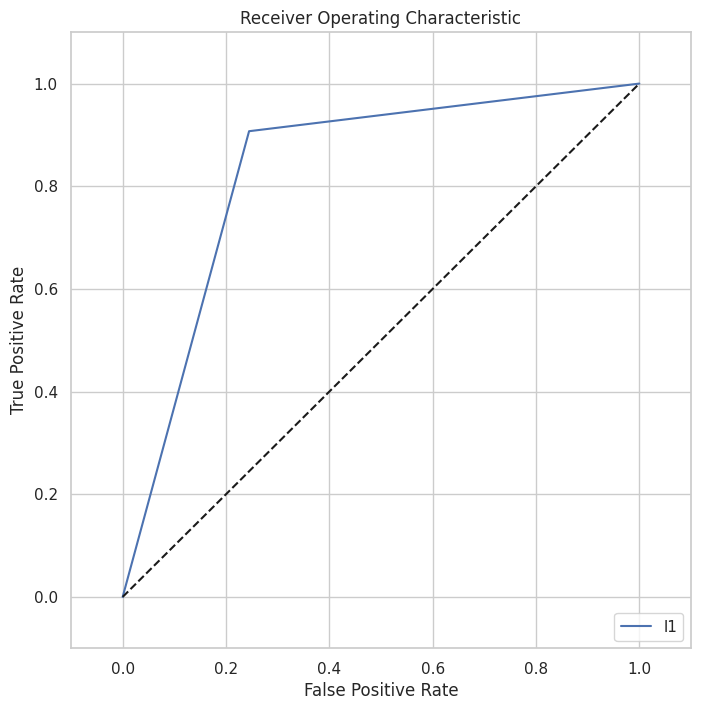

In [18]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr1, tpr1, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Performance Evaluation:**

In [19]:
#computing the accuracy of the model performance
acc_train_model = accuracy_score(y_train,y_train_model)
acc_test_model = accuracy_score(y_test,y_test_model)

print("LogisticRegression: Accuracy on the Model: ",model_score)
print("LogisticRegression: Accuracy on training Data: {:.3f}".format(acc_train_model))
print("LogisticRegression: Accuracy on test Data: {:.3f}".format(acc_test_model))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

LogisticRegression: Accuracy on the Model:  0.811
LogisticRegression: Accuracy on training Data: 0.796
LogisticRegression: Accuracy on test Data: 0.811
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1025
           1       0.91      0.68      0.78       975

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.83      0.81      0.81      2000

[[957  68]
 [310 665]]


In [20]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('LogisticRegression', acc_train_model, acc_test_model)

## Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

tree_score=model.score(X_test, y_test)

In [22]:
fpr2, tpr2, thresholds = roc_curve(y_test_tree, y_test)

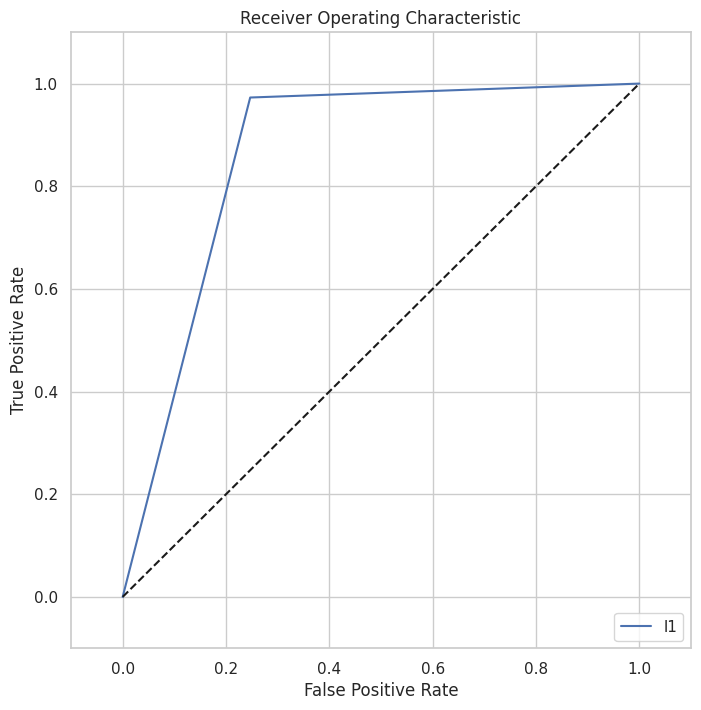

In [23]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr2, tpr2, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Performance Evaluation:**

In [24]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on the Model: ",tree_score)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Decision Tree: Accuracy on the Model:  0.811
Decision Tree: Accuracy on training Data: 0.810
Decision Tree: Accuracy on test Data: 0.826
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1025
           1       0.91      0.68      0.78       975

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.83      0.81      0.81      2000

[[957  68]
 [310 665]]


In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## Random Forest Classifier

In [26]:
# instantiate the model
forest = RandomForestClassifier(max_depth=5)
# fit the model
forest.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
model_score=model.score(X_test, y_test)

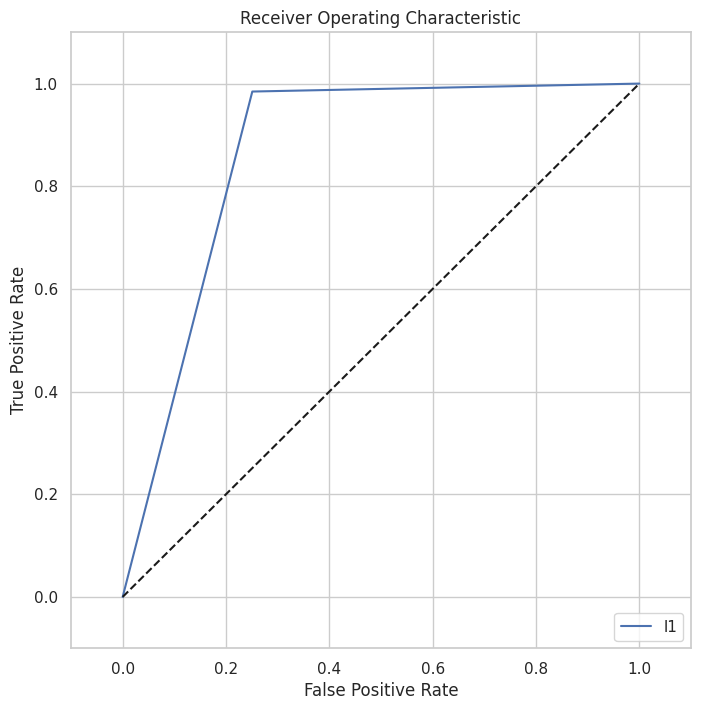

In [27]:
fpr3, tpr3, thresholds = roc_curve(y_test_forest, y_test)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr3, tpr3, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Performance Evaluation:**

In [28]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on the Model: ",model_score)
print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Random forest: Accuracy on the Model:  0.811
Random forest: Accuracy on training Data: 0.810
Random forest: Accuracy on test Data: 0.825
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1025
           1       0.91      0.68      0.78       975

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.83      0.81      0.81      2000

[[957  68]
 [310 665]]


In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random forest', acc_train_forest, acc_test_forest)

## KNeighborsClassifier

In [30]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors =1)
# fit the model
knn.fit(X_train,np.ravel(y_train,order='C'))
#predicting the target value from the model for the samples
y_predict= knn.predict(X_test)

#predicting the target value from the model for the samples
y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)
model_score=knn.score(X_test, y_test)

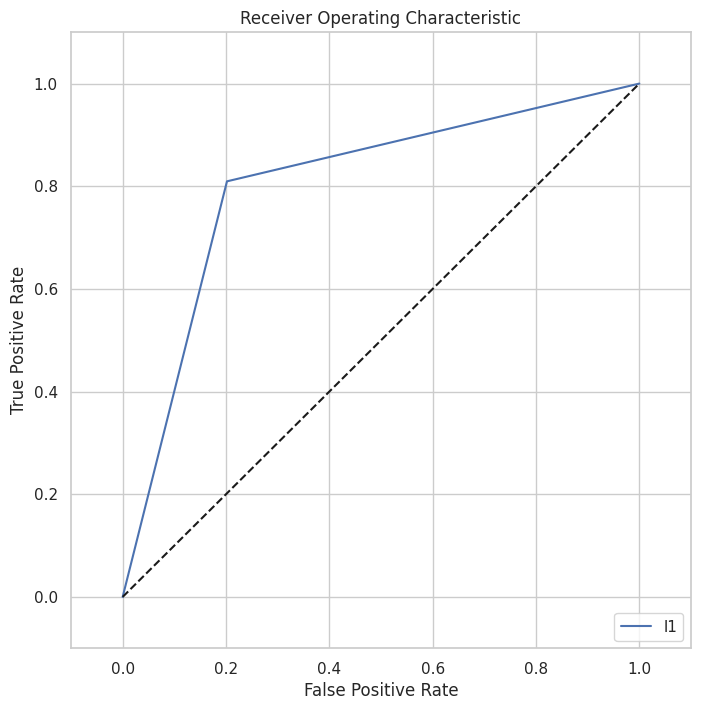

In [31]:
fpr4, tpr4, thresholds = roc_curve(y_test_knn, y_test)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr4, tpr4, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Performance Evaluation:**

In [32]:
#computing the accuracy of the model performance
acc_train_knn = accuracy_score(y_train,y_train_knn)
acc_test_knn = accuracy_score(y_test,y_test_knn)

print("KNeighborsClassifier: Accuracy on the Model: ",model_score)
print("KNeighborsClassifier: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNeighborsClassifier: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

KNeighborsClassifier: Accuracy on the Model:  0.8035
KNeighborsClassifier: Accuracy on training Data: 0.811
KNeighborsClassifier: Accuracy on test Data: 0.803
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1025
           1       0.81      0.78      0.79       975

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

[[846 179]
 [214 761]]


In [34]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('KNeighborsClassifier', acc_train_knn, acc_test_knn)

## XGBoost Classifier

In [35]:
# instantiate the model
xgb = XGBClassifier(use_label_encoder =False,learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)
model_score=xgb.score(X_test, y_test)
fpr5, tpr5, thresholds = roc_curve(y_test_xgb, y_test)

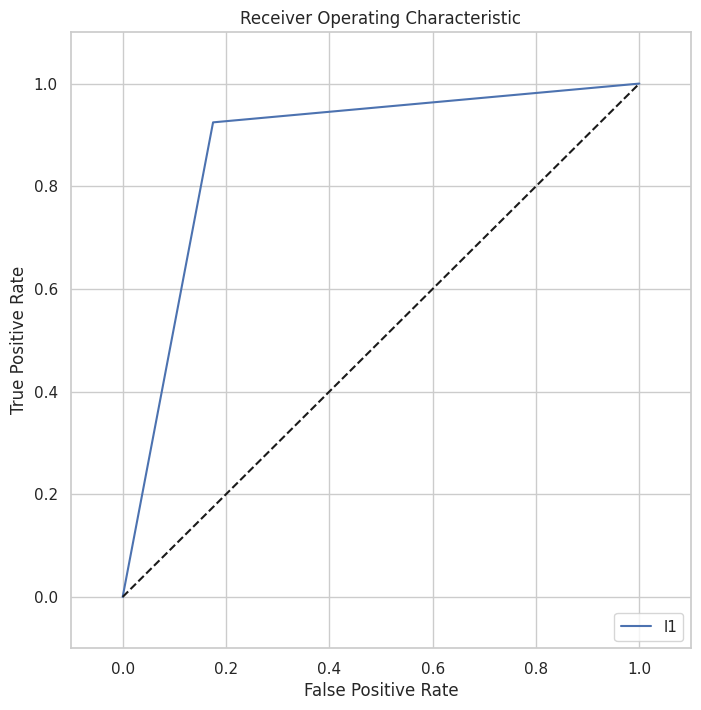

In [36]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr5, tpr5, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Performance Evaluation:**

In [37]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on the Model: ",model_score)
print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

XGBoost: Accuracy on the Model:  0.8665
XGBoost: Accuracy on training Data: 0.866
XGBoost : Accuracy on test Data: 0.867
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1025
           1       0.81      0.78      0.79       975

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

[[846 179]
 [214 761]]


In [38]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [39]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.796,0.811
1,Decision Tree,0.810,0.826
2,Random forest,0.810,0.825
3,KNeighborsClassifier,0.811,0.804
4,XGBoost,0.866,0.866


In [40]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
4,XGBoost,0.866,0.866
1,Decision Tree,0.810,0.826
2,Random forest,0.810,0.825
0,LogisticRegression,0.796,0.811
3,KNeighborsClassifier,0.811,0.804


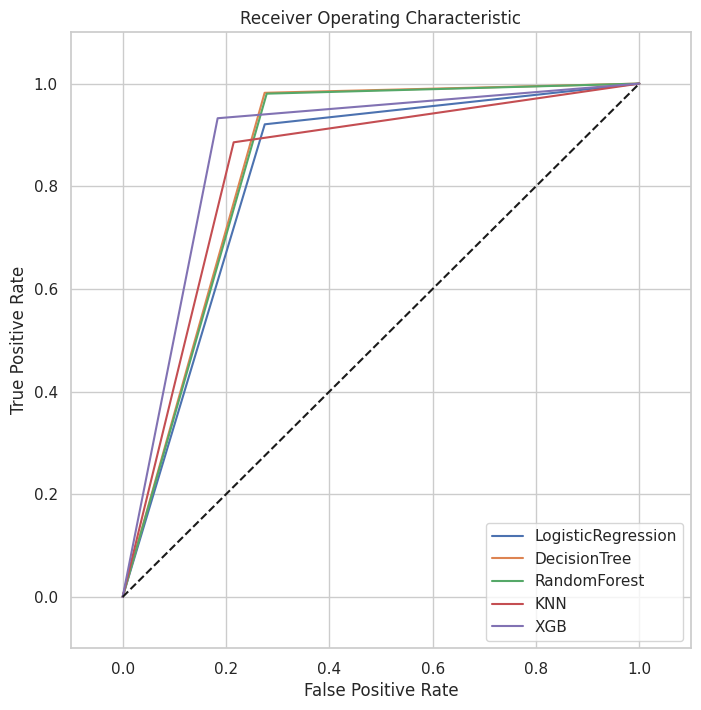

In [ ]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr1, tpr1, label='LogisticRegression')
plt.plot(fpr2, tpr2, label='DecisionTree')
plt.plot(fpr3, tpr3, label='RandomForest')
plt.plot(fpr4, tpr4, label='KNN')
plt.plot(fpr5, tpr5, label='XGB')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()